__Research Question 1__
* Is there positive or negative judgement of books over time?
   * If its popularity is growing or declining over time.
   
* Is there growth or decline of book genere?
    * books published at what time, are readers enjoying

In [1]:
import pandas as pd

In [2]:
!ls

Untitled.rtf                   books_review_thriller.json
books_interactions_final.json  readme.rtf
books_metadata_comics.json     rq1.ipynb
books_metadata_thriller.json   rq2.ipynb
books_review_comics_final.json


In [3]:
books_metadata = pd.read_json('books_metadata_comics.json')
books_review_comics = pd.read_json('books_review_comics_final.json')

# Comics and graphics analysis

In [4]:
books_metadata.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2"
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3"
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (..."


In [5]:
books_metadata['publication_year'].unique()

array([2012, 1997, 2016, 2011, 2010, 2014, 2009, 2013, 1989, 2006, 2015,
       2017, 2007, 2002, 2008, 1990, 2005, 1991, 2004, 2003, 2018, 1986,
       1998, 1999, 1993, 1995, 2000, 1996, 2001, 1987, 1988, 1992, 1994])

In [6]:
rating_year = books_metadata[['average_rating','publication_year']].sort_values(by=['publication_year'])

In [7]:
rating_year

,average_rating,publication_year
72703,2.83,1986
21558,4.04,1986
5353,4.23,1986
63729,4.25,1986
41738,4.16,1986
...,...,...
84495,3.67,2018
71450,3.90,2018
40488,4.39,2018
85327,4.59,2018


In [8]:
mean_rating_year = rating_year.groupby('publication_year').agg('mean')

In [9]:
count = rating_year.groupby('publication_year').agg('count')

In [10]:
mean_rating_year['rating_count'] = count['average_rating']

In [11]:
mean_rating_year

,average_rating,rating_count
publication_year,,
1986,3.974054,37
1987,3.926444,45
1988,4.097115,52
1989,3.853860,57
1990,3.823662,71
1991,3.930980,51
1992,3.919273,55
1993,3.894800,75
1994,3.950000,62


In [12]:
print("min mean rating : ", mean_rating_year['average_rating'].min())
print("max mean rating : ", mean_rating_year['average_rating'].max())

min mean rating :  3.78264705882353
max mean rating :  4.0971153846153845


<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

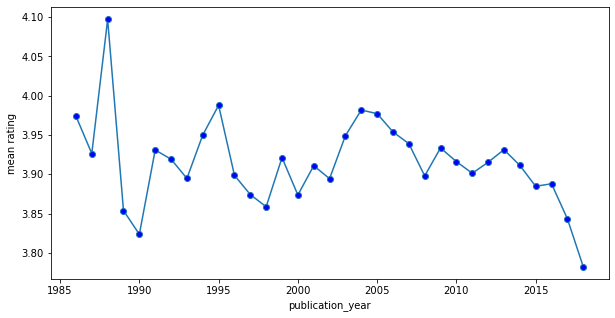

In [13]:
mean_rating_year['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

__minimum rating count of 30__

<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

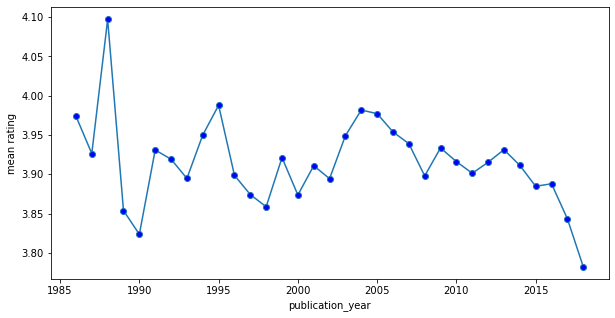

In [14]:
mean_rating_year[mean_rating_year['rating_count']>=30]['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

In [15]:
count_rating_year = rating_year.groupby('publication_year').agg('count')

In [16]:
print("min count of rating : ", count_rating_year['average_rating'].min())
print("max count of rating : ", count_rating_year['average_rating'].max())

min count of rating :  34
max count of rating :  2874


In [17]:
count_rating_year

,average_rating
publication_year,
1986,37
1987,45
1988,52
1989,57
1990,71
1991,51
1992,55
1993,75
1994,62


<AxesSubplot:xlabel='publication_year', ylabel='frequency'>

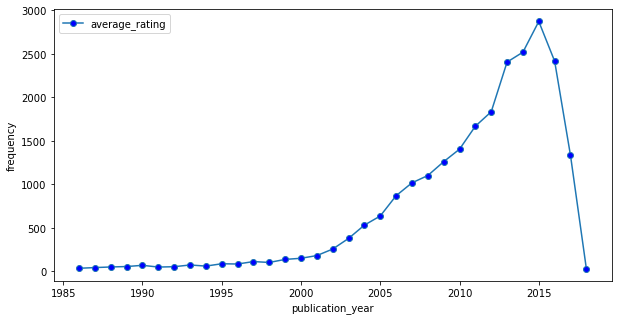

In [18]:
count_rating_year.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='frequency')

__Error bars__
* are the graphical representations of the variability of data
* used on graphs to indicate the error or uncertainty in a reported measurement
* they give a general idea of how precise a measurement is or conversely how far from the reported value the true (error free) value might be
* representsw one standard deviation of uncertainty, one standard error or particular confidence interval (eg: 95% interval)


* Bar charts without error bars give the illusion that a measured or calculated value is known to high precision or high confidence.

__steps__
* first data stored in the array
* mean of array is calculated : mean will be the height of the bars in the plot
* std of array is calculated : std will be the height of error bars

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#data
rating_count = np.array(mean_rating_year[['rating_count']])
average_rating = np.array(mean_rating_year[['average_rating']])

In [36]:
#calculate the average
rating_count_mean = np.mean(rating_count)
average_rating_mean = np.mean(average_rating)

In [37]:
#calculate the standrd deviation
rating_count_std = np.std(rating_count)
average_rating_std = np.std(average_rating)

In [39]:
labels = ['rating_count']
x_pos = np.arange(len(labels))
CTEs = [rating_count_mean]
error = [rating_count_std]

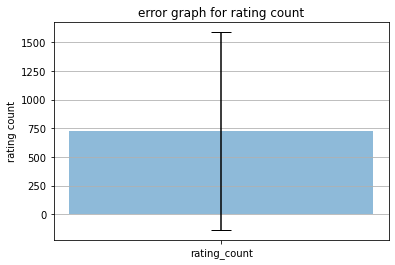

In [41]:
#build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10
      )
ax.set_ylabel('rating count')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('error graph for rating count')
ax.yaxis.grid(True)

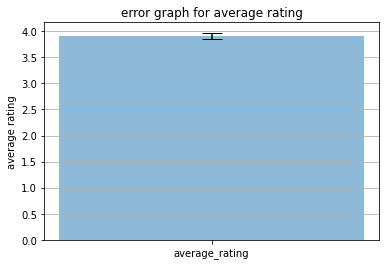

In [42]:
labels = ['average_rating']
x_pos = np.arange(len(labels))
CTEs = [average_rating_mean]
error = [average_rating_std]


#build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10
      )
ax.set_ylabel('average rating')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('error graph for average rating')
ax.yaxis.grid(True)

# Mystery, thriller and crime

In [19]:
books_metadata_thriller = pd.read_json('books_metadata_thriller.json')

In [20]:
books_metadata_thriller.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)"
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench


In [21]:
books_metadata_thriller['publication_year'].unique()

array([2013, 2014, 2004, 2006, 2016, 2015, 2008, 1998, 1954, 2011, 1996,
       2012, 2010, 2002, 2000, 2003, 1991, 1960, 2017, 1997, 2007, 2005,
       1999, 1995, 1951, 1989, 2009, 2001, 1987, 1993, 1962, 1992, 1990,
       1986, 1981, 1978, 1988, 1964, 1946, 1979, 1966, 1976, 1994, 1973,
       1963, 1983, 1980, 1952, 1982, 1972, 1965, 1984, 1968, 1985, 1974,
       1958, 1967, 1969, 1975, 1955, 2018, 1971, 1961, 1957, 1956, 1977,
       1970, 1959, 1950, 1953])

In [22]:
rating_year_thriller = books_metadata_thriller[['average_rating','publication_year']].sort_values(by=['publication_year'])

In [23]:
rating_year_thriller

,average_rating,publication_year
65997,3.50,1946
45330,3.85,1946
43483,3.78,1946
29487,3.92,1946
59541,3.19,1946
...,...,...
44869,4.26,2018
67211,4.02,2018
10352,3.33,2018
39650,3.90,2018


In [24]:
mean_rating_thriller = rating_year_thriller.groupby('publication_year').agg('mean')
count = rating_year_thriller.groupby('publication_year').agg('count')

In [25]:
mean_rating_thriller['rating_count']  = count['average_rating']
mean_rating_thriller

,average_rating,rating_count
publication_year,,
1946,3.670000,33
1950,3.666600,50
1951,3.706216,37
1952,3.697714,35
1953,3.749778,45
...,...,...
2014,3.901364,6978
2015,3.926281,6209
2016,3.947916,5427


<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

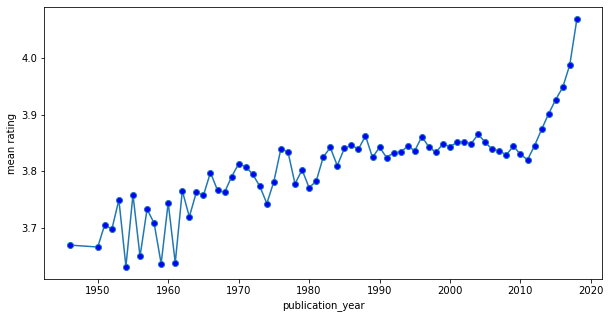

In [26]:
mean_rating_thriller['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

__rating count above 30__

<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

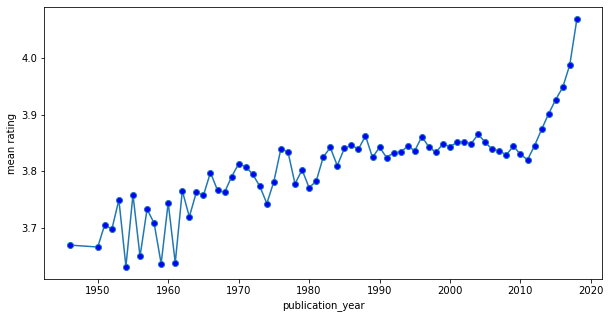

In [27]:
mean_rating_thriller[mean_rating_thriller['rating_count']>=30]['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

In [28]:
count_rating_thriller = rating_year_thriller.groupby('publication_year').agg('count')

In [29]:
count_rating_thriller

,average_rating
publication_year,
1946,33
1950,50
1951,37
1952,35
1953,45
...,...
2014,6978
2015,6209
2016,5427


<AxesSubplot:xlabel='publication_year', ylabel='frequency'>

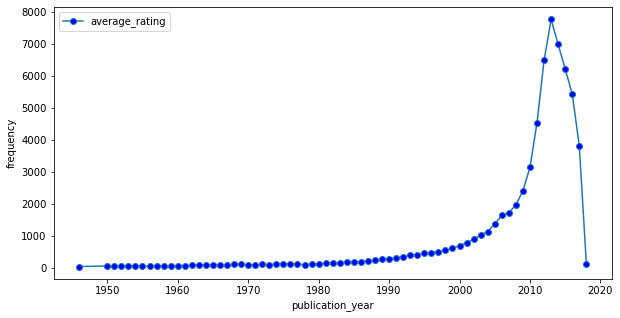

In [30]:
count_rating_thriller.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='frequency')

In [43]:
#data
th_rating_count = np.array(mean_rating_thriller[['rating_count']])
th_average_rating = np.array(mean_rating_thriller[['average_rating']])

In [44]:
#calculate the average
th_rating_count_mean = np.mean(th_rating_count)
th_average_rating_mean = np.mean(th_average_rating)

In [46]:
#calculate the standrd deviation
th_rating_count_std = np.std(th_rating_count)
th_average_rating_std = np.std(th_average_rating)

In [47]:
labels = ['rating_count']
x_pos = np.arange(len(labels))
CTEs = [th_rating_count_mean]
error = [th_rating_count_std]

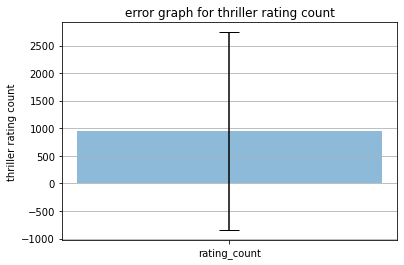

In [48]:
#build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10
      )
ax.set_ylabel('thriller rating count')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('error graph for thriller rating count')
ax.yaxis.grid(True)